In [1]:
file = '../Data/SATELLITE/GOES13/level_2/2016/S10187670_201612251800'

with open(file, 'rb') as bin_file:
    data = bin_file.read()
    print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [76]:
from netCDF4 import Dataset

nc = Dataset('GOES13_d20161225_t144518_b04')
print(nc)

data = np.array(nc['data']).squeeze()
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.4
    Source: McIDAS Area File
    Satellite Sensor: G-13 IMG    
    dimensions(sizes): xc(480), yc(640), time(1), auditCount(3), auditSize(80)
    variables(dimensions): int32 version(), int32 sensorID(), int32 imageDate(), int32 imageTime(), int32 startLine(), int32 startElem(), int32 time(time), int32 dataWidth(), int32 lineRes(), int32 elemRes(), int32 prefixSize(), int32 crDate(), int32 crTime(), int32 bands(), |S1 auditTrail(auditCount,auditSize), float32 data(time,yc,xc), float32 lat(yc,xc), float32 lon(yc,xc)
    groups: 

[[512. 480. 512. ... 512. 512. 544.]
 [480. 480. 512. ... 512. 512. 512.]
 [512. 512. 512. ... 512. 512. 512.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


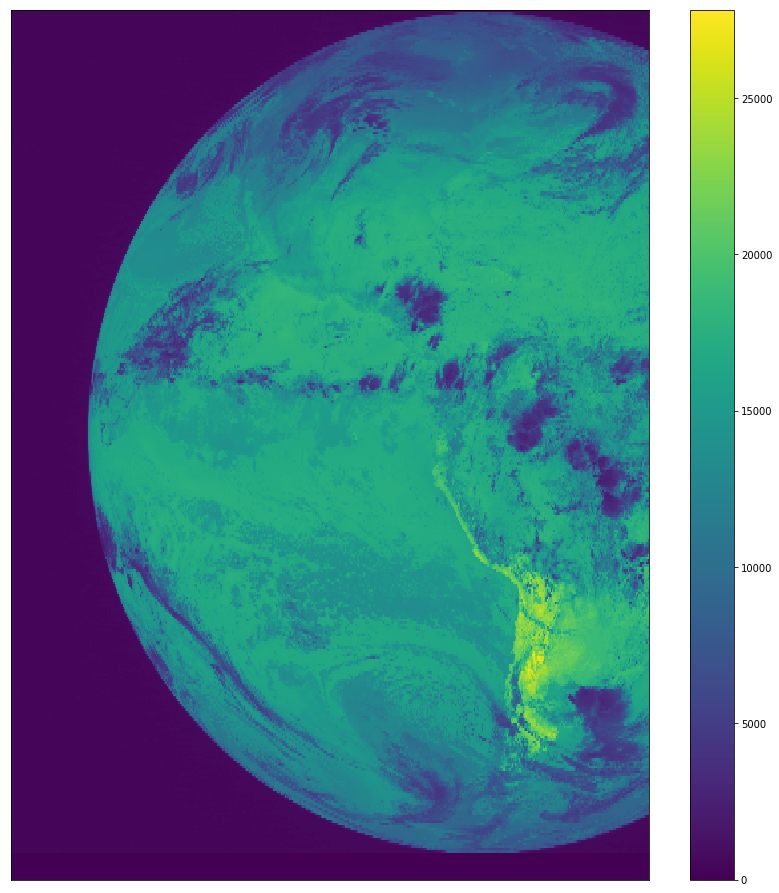

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

fig = plt.figure(figsize=(15, 16))
fig.set_facecolor('w')
ax = fig.add_subplot(111)

bmap = Basemap(llcrnrlon=-85, llcrnrlat=-60., urcrnrlon=-30., urcrnrlat=15., epsg=4326)

# bmap.readshapefile('../Data/GENERAL/shapefiles/ne_10m_admin_0_countries', 'ne_10m_admin_0_countries', linewidth=0.5, color='darkslategray')
# bmap.readshapefile('../Data/GENERAL/shapefiles/estadosl_2007', 'estadosl_2007', linewidth=0.3, color='darkslategray')
# bmap.drawparallels(np.arange(-90.0, 90.0, 10.), linewidth=0.25, color='white', labels=[True,False,False,True])
# bmap.drawmeridians(np.arange(0.0, 360.0, 10.), linewidth=0.25, color='white', labels=[True,False,False,True])

bmap.imshow(data[:350, :1500], origin='upper', aspect=2)

plt.colorbar()